<a href="https://colab.research.google.com/github/pavithraa03/Paviii/blob/main/Copy_of_Credit_Fraud_Detection_STGCN%5Bfinal%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-geometric
!pip install networkx numpy pandas matplotlib sklearn

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/DataSets/creditcard.csv'
df = pd.read_csv(file_path)

df.head()  # to preview the data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


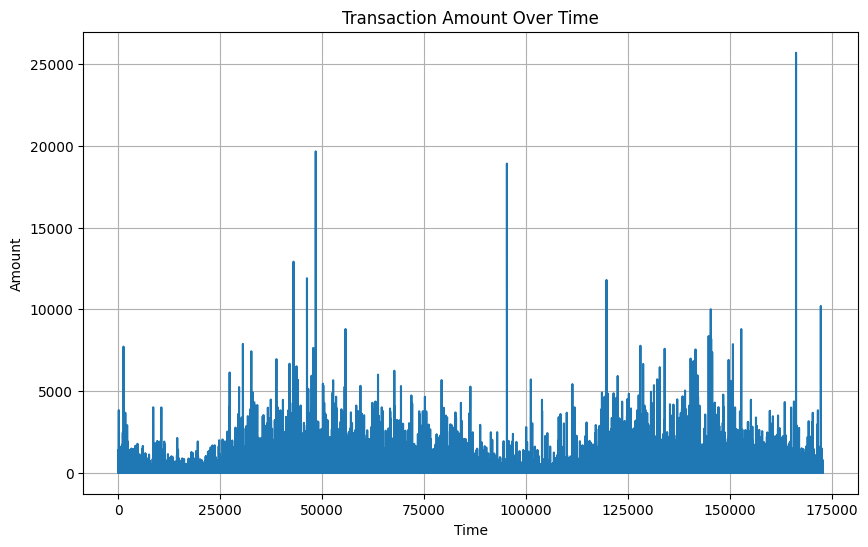

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Time' is the column representing time and 'Amount' is the transaction amount
# Replace 'Time' and 'Amount' with your actual column names if different

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Amount'])
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Transaction Amount Over Time')
plt.grid(True)
plt.show()


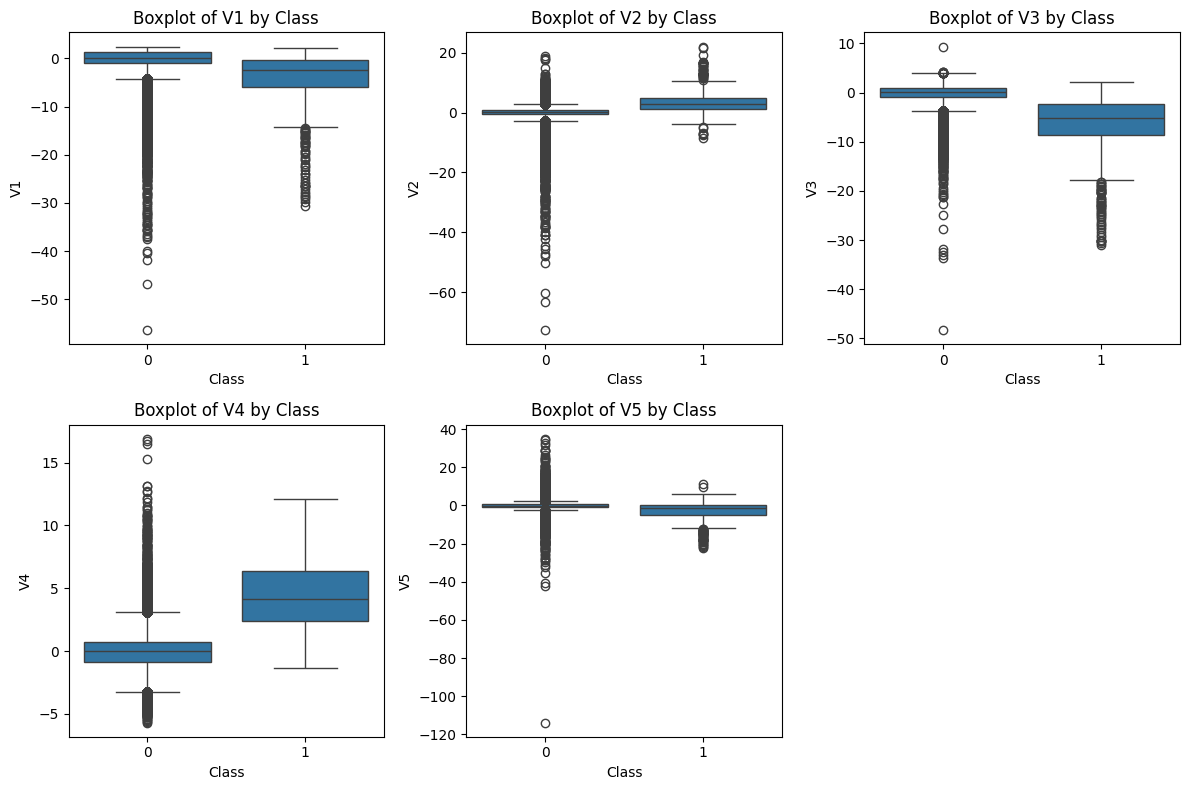

In [ ]:
# Boxplots for key features (V1-V28)
# Sample 5 features for demonstration, you can extend this
import seaborn as sns  # Import seaborn
features = ['V1', 'V2', 'V3', 'V4', 'V5']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Class')
plt.tight_layout()
plt.show()

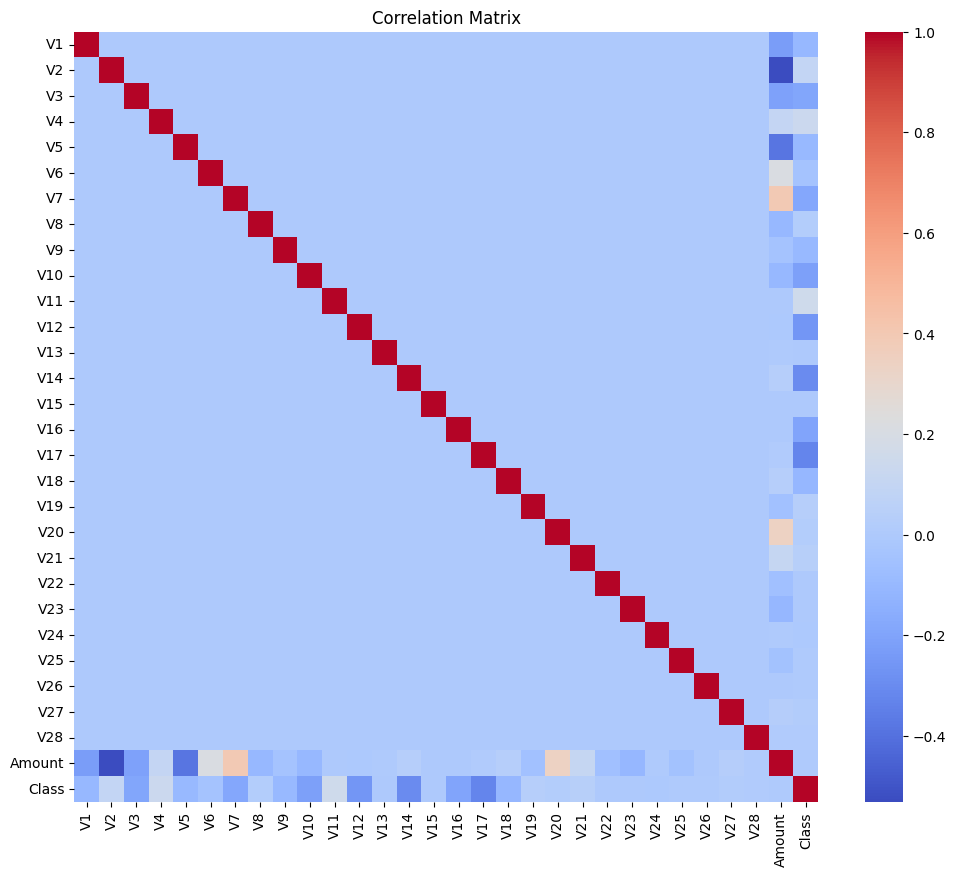

In [ ]:
# Correlation matrix heatmap (excluding Time feature for better visualization)
correlation_matrix = df.drop('Time', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

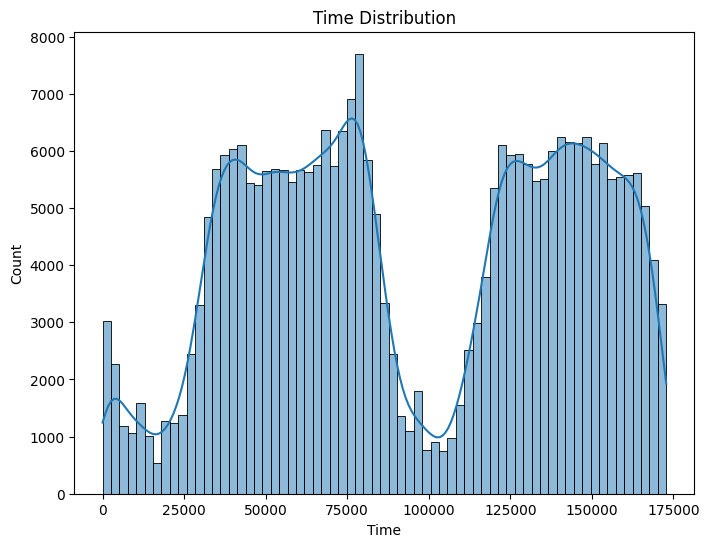

In [ ]:
# Time distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Time'], kde=True)
plt.title('Time Distribution')
plt.show()

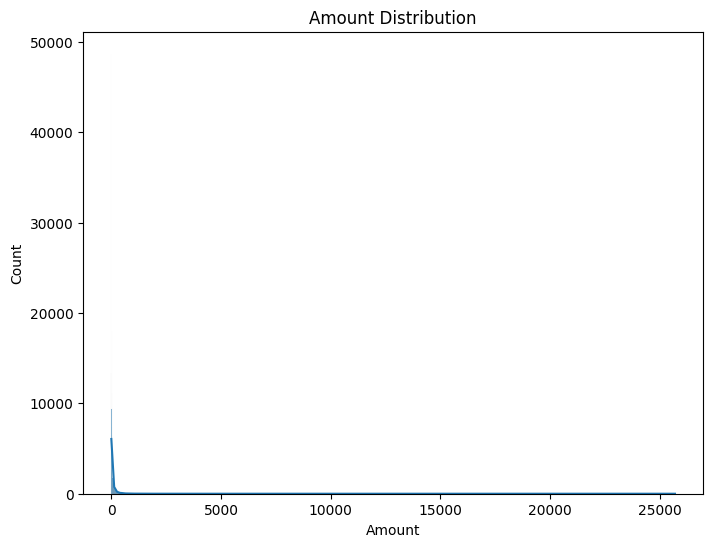

In [ ]:
# Amount distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount'], kde=True)
plt.title('Amount Distribution')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.nunique()

,0
Time,124592
V1,275663
V2,275663
V3,275663
V4,275663
V5,275663
V6,275663
V7,275663
V8,275663
V9,275663


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


EDA

In [ ]:
df.duplicated().sum()

np.int64(1081)

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
non_fraud.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


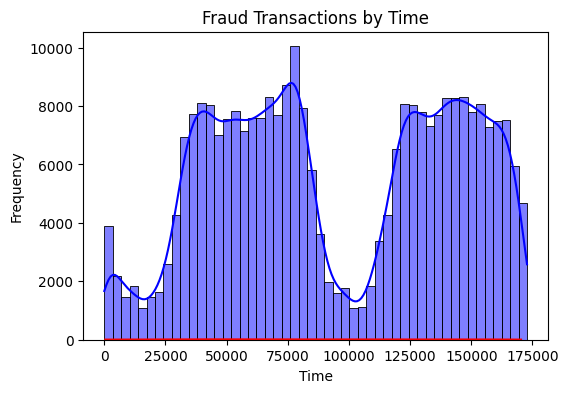

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(fraud['Time'], bins=50, kde=True, color='red', label='Fraud')
sns.histplot(non_fraud['Time'], bins=50, kde=True, color='blue', label='Non-Fraud')
plt.title('Fraud Transactions by Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import networkx as nx
import numpy as np
import torch

# Create a synthetic transaction graph
G = nx.erdos_renyi_graph(n=1000, p=0.01)  # 1000 nodes, 1% connection probability
features = np.random.rand(1000, 10)  # Random node features (e.g., transaction amount, time, location)
labels = np.random.randint(0, 2, size=(1000,))  # Binary fraud labels

# Convert to tensors
x = torch.tensor(features, dtype=torch.float)
y = torch.tensor(labels, dtype=torch.long)
edge_index = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()


In [ ]:
!pip install torch torch-geometric


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GatedGraphConv

class STGCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0.5):
        super(STGCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)  # Spatial Layer
        self.conv2 = GatedGraphConv(hidden_channels, num_layers=2)  # Temporal Layer
        self.conv3 = GCNConv(hidden_channels, out_channels)  # Output Layer
        self.dropout = dropout  # Store dropout rate

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)  # Correct place for dropout
        x = F.relu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cuda.so: undefined symbol: _ZN3c1017Registe

In [ ]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

# Prepare Graph Data
data = Data(x=x, edge_index=edge_index, y=y)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%env CUDA_LAUNCH_BLOCKING=1
print("Unique labels:", data.y.unique())  # Should print tensor([0, 1])
print("Data type:", data.y.dtype)  # Should be torch.int64
data.y = data.y.long()  # Convert to int64
# Ensure labels are within the range [0, num_classes - 1]
# If num_classes is 2, then labels should be 0 or 1
data.y = torch.clamp(data.y, min=0, max=1)
# Initialize Model before using it
model = STGCN(in_channels=10, hidden_channels=16, out_channels=2, dropout=0.2)
# env CUDA_LAUNCH_BLOCKING=1 # This is for debugging and might not be necessary
# Validate edge_index before passing to the model
# Check for self-loops and invalid node indices
edge_index = data.edge_index
num_nodes = data.x.shape[0]
# Filter out invalid edges and self-loops
valid_edges = (edge_index[0] >= 0) & (edge_index[0] < num_nodes) & (edge_index[1] >= 0) & (edge_index[1] < num_nodes) & (edge_index[0] != edge_index[1])
data.edge_index = edge_index[:, valid_edges]

# Move the model to the device after validating edge_index
model = model.to(device)

# Now pass data to the model
out = model(data.x.to(device), data.edge_index.to(device)) # Now model is defined before this line
print("Output shape:", out.shape)  # Should be [batch_size, num_classes]
print("Output example:", out[:5])  # Logits, not softmax values

env: CUDA_LAUNCH_BLOCKING=1
Unique labels: tensor([0, 1])
Data type: torch.int64
Output shape: torch.Size([1000, 2])
Output example: tensor([[-0.4804, -0.9637],
        [-0.6281, -0.7627],
        [-0.5836, -0.8162],
        [-0.4590, -0.9994],
        [-0.5717, -0.8315]], device='cuda:0', grad_fn=<SliceBackward0>)


In [ ]:
def test():
    model.eval()
    with torch.no_grad():
        out = model(data.x.to(device), data.edge_index.to(device))
        pred = out.argmax(dim=1)
        acc = (pred == data.y.to(device)).sum().item() / data.y.size(0)
    print(f"Test Accuracy: {acc:.4f}")

test()

Test Accuracy: 0.5030


In [ ]:
!pip install optuna
import optuna
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GatedGraphConv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 20.5 MB/s eta 0:00:00


In [ ]:
class STGCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout):
        super(STGCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GatedGraphConv(hidden_channels, num_layers=2)
        self.conv3 = GCNConv(hidden_channels, out_channels)
        self.dropout = dropout

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)

In [ ]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

# Prepare Graph Data
data = Data(x=x, edge_index=edge_index, y=y)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize Model
# Changed dropout to 0.2 (it should be in the range [0, 1])
# Assuming out_channels is 2 for binary classification
model = STGCN(in_channels=10, hidden_channels=16, out_channels=2, dropout=0.2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Train Loop
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x.to(device), data.edge_index.to(device))
    loss = criterion(out, data.y.to(device))
    loss.backward()
    optimizer.step()
    return loss.item()

# Training for 100 epochs
for epoch in range(100):
    loss = train()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.6991
Epoch 10, Loss: 0.6946
Epoch 20, Loss: 0.6908
Epoch 30, Loss: 0.6903
Epoch 40, Loss: 0.6879
Epoch 50, Loss: 0.6865
Epoch 60, Loss: 0.6845
Epoch 70, Loss: 0.6815
Epoch 80, Loss: 0.6824
Epoch 90, Loss: 0.6803


In [ ]:
def objective(trial):
    # Hyperparameter search space
    hidden_channels = trial.suggest_categorical("hidden_channels", [16, 32, 64])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
    dropout = trial.suggest_uniform("dropout", 0.2, 0.7)
    weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-3)

    # Load Data (Assume 'data' is already defined)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = STGCN(in_channels=10, hidden_channels=hidden_channels, out_channels=2, dropout=dropout).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = torch.nn.CrossEntropyLoss()

    # Training
    model.train()
    for epoch in range(50):  # Training for 50 epochs
        optimizer.zero_grad()
        out = model(data.x.to(device), data.edge_index.to(device))
        loss = criterion(out, data.y.to(device))
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        out = model(data.x.to(device), data.edge_index.to(device))
        pred = out.argmax(dim=1)
        acc = (pred == data.y.to(device)).sum().item() / data.y.size(0)

    return acc  # Maximizing accuracy


In [ ]:
from sklearn.metrics import precision_score, recall_score
def test():
    model.eval()
    with torch.no_grad():
        out = model(data.x.to(device), data.edge_index.to(device))
        pred = out.argmax(dim=1)  # Get predicted labels
        true_labels = data.y.to(device)  # Get true labels

        # Calculate precision and recall using sklearn.metrics
        precision = precision_score(true_labels.cpu(), pred.cpu())
        recall = recall_score(true_labels.cpu(), pred.cpu())

        # Calculate accuracy
        correct = (pred == true_labels).sum().item()
        total = true_labels.size(0)
        acc = correct / total

    print(f"Test Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    return acc, precision, recall

In [ ]:
# After training your model
accuracy, precision, recall = test()  # Get all three metrics

Test Accuracy: 0.6030, Precision: 0.5988, Recall: 0.6097


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)  # Run 30 trials

# Best hyperparameters
print("Best Hyperparameters:", study.best_params)

[I 2025-04-27 23:36:55,193] A new study created in memory with name: no-name-27212790-8f7c-4672-8d5e-892e699a339f
<ipython-input-24-3adb5169871a>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
<ipython-input-24-3adb5169871a>:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout = trial.suggest_uniform("dropout", 0.2, 0.7)
<ipython-input-24-3adb5169871a>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay",

Best Hyperparameters: {'hidden_channels': 64, 'learning_rate': 0.004515090193542051, 'dropout': 0.3800756509736019, 'weight_decay': 0.00021411123245435634}


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data

# Load transaction dataset (Assuming it's a CSV file)
df = pd.read_csv("/content/drive/MyDrive/DataSets/transactions.csv", on_bad_lines='skip')

print(df.columns)

# Create a Graph
G = nx.Graph()

# 1. Create a mapping for node IDs to integers
node_id_mapping = {node_id: i for i, node_id in enumerate(df['user_id'].unique())}
merchant_id_mapping = {node_id: i + len(node_id_mapping) for i, node_id in enumerate(df['merchant'].unique())} # mapping for merchants

# 2. Add Nodes (Users and Merchants) using the mapping
for user in df['user_id'].unique():
    G.add_node(node_id_mapping[user])  # Use mapped ID
for merchant in df['merchant'].unique():
    G.add_node(merchant_id_mapping[merchant]) # Use mapped ID for merchants

# 3. Add Edges (Transactions between users) using the mapping
for _, row in df.iterrows():
    G.add_edge(node_id_mapping[row['user_id']], merchant_id_mapping[row['merchant']],
               amount=row['amount'], time=row['timestamp'])  # Use mapped IDs


# 4. Convert to PyTorch Geometric format using the mapping
edge_index = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()

# Print some information for debugging
print("Node ID Mapping:", node_id_mapping)
print("Merchant ID Mapping:", merchant_id_mapping)
print("Example edge:", list(G.edges)[0])
print("Edge Index:", edge_index)
print("Edge Index shape:", edge_index.shape)
print("Edge Index dtype:", edge_index.dtype)

Index(['transaction_id', 'user_id', 'amount', 'transaction_type', 'timestamp',
       'status', 'merchant', 'payment_method'],
      dtype='object')
Node ID Mapping: {np.int64(1421): 0, np.int64(1621): 1, np.int64(1444): 2, np.int64(1002): 3, np.int64(1980): 4, np.int64(1825): 5, np.int64(1311): 6, np.int64(1706): 7, np.int64(1049): 8, np.int64(1258): 9, np.int64(1602): 10, np.int64(1640): 11, np.int64(1043): 12, np.int64(1673): 13, np.int64(1978): 14, np.int64(1577): 15, np.int64(1535): 16, np.int64(1845): 17, np.int64(1865): 18, np.int64(1826): 19, np.int64(1708): 20, np.int64(1477): 21, np.int64(1445): 22, np.int64(1552): 23, np.int64(1780): 24, np.int64(1532): 25, np.int64(1689): 26, np.int64(1071): 27, np.int64(1117): 28, np.int64(1210): 29, np.int64(1727): 30, np.int64(1961): 31, np.int64(1794): 32, np.int64(1391): 33, np.int64(1750): 34, np.int64(1594): 35, np.int64(1083): 36, np.int64(1288): 37, np.int64(1068): 38, np.int64(1613): 39, np.int64(1986): 40, np.int64(1145): 41, np.

In [ ]:
torch.save(model.state_dict(), "best_stgcn_model.pth")

In [ ]:
print(df.columns)

Index(['transaction_id', 'user_id', 'amount', 'transaction_type', 'timestamp',
       'status', 'merchant', 'payment_method'],
      dtype='object')


In [ ]:
def extract_node_features(G):
    features = []
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        transactions = [G[node][nbr]['amount'] for nbr in neighbors]

        # Feature Engineering
        avg_amount = np.mean(transactions) if transactions else 0
        max_amount = np.max(transactions) if transactions else 0
        min_amount = np.min(transactions) if transactions else 0
        std_amount = np.std(transactions) if transactions else 0
        num_transactions = len(transactions)
        degree = G.degree(node)  # Number of connections

        features.append([avg_amount, max_amount, min_amount, std_amount, num_transactions, degree])

    return torch.tensor(features, dtype=torch.float)

# Extract node features
x = extract_node_features(G)
print(x)


tensor([[4.8682e+03, 4.8682e+03, 4.8682e+03, 0.0000e+00, 1.0000e+00, 1.0000e+00],
        [2.9028e+03, 2.9028e+03, 2.9028e+03, 0.0000e+00, 1.0000e+00, 1.0000e+00],
        [2.5046e+03, 3.5397e+03, 1.4695e+03, 1.0351e+03, 2.0000e+00, 2.0000e+00],
        ...,
        [2.5936e+03, 4.8364e+03, 1.6291e+02, 1.2553e+03, 3.6000e+01, 3.6000e+01],
        [2.7273e+03, 4.9452e+03, 1.1480e+01, 1.4516e+03, 3.2000e+01, 3.2000e+01],
        [2.3748e+03, 4.9863e+03, 2.2665e+02, 1.5924e+03, 2.9000e+01, 2.9000e+01]])


In [ ]:
def extract_edge_features(G):
    features = []
    for edge in G.edges():
        amount = G[edge[0]][edge[1]]['amount']
        time_diff = np.abs(G.nodes[edge[0]]['time'] - G.nodes[edge[1]]['time']) if 'time' in G.nodes[edge[0]] else 0
        features.append([amount, time_diff])

    return torch.tensor(features, dtype=torch.float)

edge_attr = extract_edge_features(G)


In [ ]:
def add_temporal_features(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['hour'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.dayofweek
    df['time_diff'] = df.groupby('user_id')['timestamp'].diff().dt.total_seconds().fillna(0)
    return df

df = add_temporal_features(df)

NameError: name 'df' is not defined

In [ ]:
def aggregate_features(df):
    agg_features = df.groupby("user_id").agg({
        "amount": ["mean", "std", "max"],
        "time_diff": ["mean", "std"],
        "hour": ["mean", "std"]
    })
    agg_features.columns = ["_".join(x) for x in agg_features.columns.ravel()]
    return agg_features.reset_index()

df_agg = aggregate_features(df)


In [ ]:
!pip install imbalanced-learn

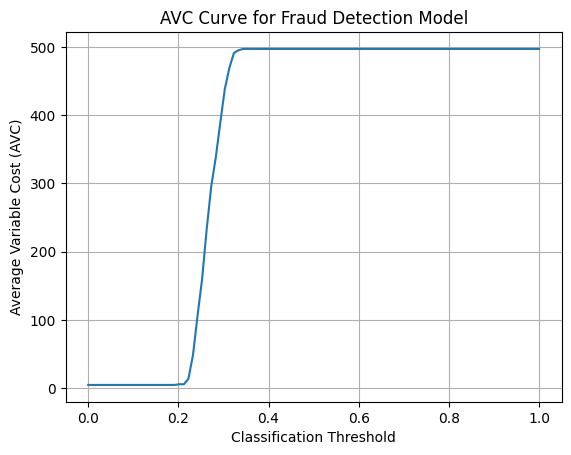

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import torch

def calculate_avc(y_true, y_pred_probs, fp_cost, fn_cost, thresholds):
    """
    Calculates the Average Variable Cost (AVC) for different thresholds.

    Args:
        y_true: True labels (0 for non-fraud, 1 for fraud).
        y_pred_probs: Predicted probabilities of fraud.
        fp_cost: Cost of a false positive.
        fn_cost: Cost of a false negative.
        thresholds: A list of classification thresholds.

    Returns:
        A list of AVC values corresponding to the given thresholds.
    """

    avc_values = []
    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        total_cost = fp * fp_cost + fn * fn_cost
        avc = total_cost / len(y_true)  # Average cost per transaction
        avc_values.append(avc)
    return avc_values

# Assuming 'out' contains raw model output (logits)
# Convert to probabilities using sigmoid for binary classification
out_probs = torch.sigmoid(out)  # Adjust 'out' to your model's raw output

# Define costs for FP and FN
fp_cost = 10  # Example cost for a false positive
fn_cost = 1000  # Example cost for a false negative (increased significantly)
thresholds = np.linspace(0, 1, 100)

# Calculate AVC values using probabilities
avc_values = calculate_avc(data.y.cpu().numpy(), out_probs.detach().cpu().numpy()[:, 1], fp_cost, fn_cost, thresholds)

# Plot the AVC Curve
plt.plot(thresholds, avc_values)
plt.xlabel("Classification Threshold")
plt.ylabel("Average Variable Cost (AVC)")
plt.title("AVC Curve for Fraud Detection Model")
plt.grid(True)
plt.show()

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GatedGraphConv

class STGCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout):
        super(STGCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)  # Spatial Layer 1
        self.conv2 = GCNConv(hidden_channels, hidden_channels)  # Spatial Layer 2 (Added)
        self.conv3 = GatedGraphConv(hidden_channels, num_layers=2)  # Temporal Layer
        self.conv4 = GCNConv(hidden_channels, out_channels)  # Output Layer
        self.dropout = dropout

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))  # Apply the new spatial layer
        x = F.dropout(x, p=self.dropout, training=self.training)  # Apply dropout again
        x = F.relu(self.conv3(x, edge_index))
        x = self.conv4(x, edge_index)
        return F.log_softmax(x, dim=1)

# Assuming your data and device are already defined
# ... (data, device, etc.) ...

# Initialize the modified model
model = STGCN(in_channels=10, hidden_channels=16, out_channels=2, dropout=0.2).to(device)

# ... (rest of your code, including the test() function) ...

# Run the test
test()

Test Accuracy: 0.4810, Precision: 0.3281, Recall: 0.0423


(0.481, 0.328125, 0.04225352112676056)

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GatedGraphConv

class STGCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout):
        super(STGCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)  # Spatial Layer 1
        self.conv2 = GCNConv(hidden_channels, hidden_channels)  # Spatial Layer 2
        self.conv3 = GatedGraphConv(hidden_channels, num_layers=2)  # Temporal Layer 1
        self.conv4 = GatedGraphConv(hidden_channels, num_layers=2)  # Temporal Layer 2 (Added)
        self.conv5 = GatedGraphConv(hidden_channels, num_layers=2)  # Temporal Layer 3 (Added)
        self.conv6 = GCNConv(hidden_channels, hidden_channels)  # Spatial Layer 3
        self.conv7 = GCNConv(hidden_channels, out_channels)  # Output Layer
        self.dropout = dropout

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv3(x, edge_index))
        x = F.relu(self.conv4(x, edge_index))  # Apply the new temporal layer
        x = F.dropout(x, p=self.dropout, training=self.training) # Apply dropout
        x = F.relu(self.conv5(x, edge_index))  # Apply the new temporal layer
        x = F.dropout(x, p=self.dropout, training=self.training) # Apply dropout
        x = F.relu(self.conv6(x, edge_index))  # Apply spatial layer
        x = F.dropout(x, p=self.dropout, training=self.training)  # Apply dropout
        x = self.conv7(x, edge_index)  # Pass through the output layer
        return F.log_softmax(x, dim=1)

# ... (rest of your code, including data loading, device setup, and the test() function) ...

# Assuming your data and device are already defined
# ... (data, device, etc.) ...

# Initialize the modified model
model = STGCN(in_channels=10, hidden_channels=16, out_channels=2, dropout=0.2).to(device)

# ... (Your training loop or loading of pre-trained weights here) ...

# Run the test
test()

Test Accuracy: 0.5090, Precision: 0.5037, Recall: 0.8169


(0.509, 0.5037220843672456, 0.8169014084507042)